In [2]:
#1 import data/libraries
import random

import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
dataset = sklearn.datasets.fetch_openml("CIFAR_10_small", cache=True)
dataset_num = sklearn.datasets.fetch_openml('mnist_784')
import torch



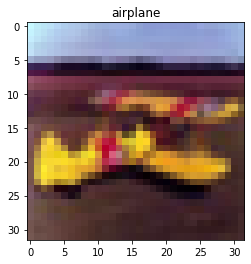

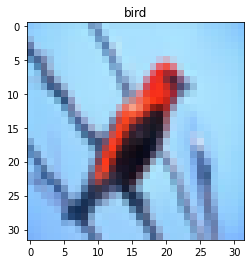

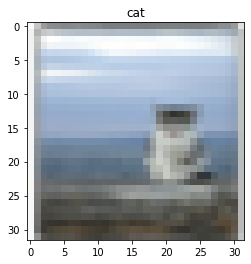

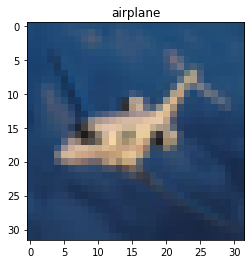

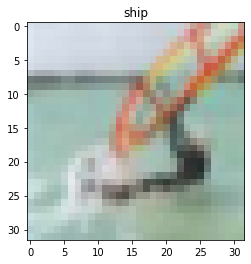

In [3]:
for i in range(5):
    rand = random.randrange(0,20000,1)
    data = dataset["data"].iloc[rand].tolist()
    classNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    classifications = dataset["target"].iloc[rand]
    data = np.array(data)
    #print(data)
    data = data.reshape(3, 32, 32)
    im = np.transpose(data, axes=[1, 2, 0])
    im = np.uint8(im)
    #print(data)
    #print(img)
    #img = np.array(img)
    plt.imshow(Image.fromarray(im))
    plt.title(classNames[int(classifications)])
    plt.show()


In [ ]:
#create train test splits for data
train_img, test_img, train_lbl, test_lbl = train_test_split(dataset.data, dataset.target, test_size= .25, random_state=0)
train_img_num, test_img_num, train_lbl_num, test_lbl_num = train_test_split(dataset_num.data, dataset_num.target, test_size= .25, random_state=0)

#Train Logistic Regression Model
clf_l1 = LogisticRegression(fit_intercept=True,
                            multi_class= 'multinomial',
                            penalty= 'l2',
                            solver= 'saga',
                            max_iter= 100,
                            C=.001,
                            verbose=1, n_jobs=4
                            )

clf_l1.fit(train_img, train_lbl)

KeyboardInterrupt: 

In [ ]:
#Prediction test
pred0 = clf_l1.predict(np.array(test_img.iloc[0]).reshape(1,-1))

print(pred0)
fig = plt.figure()

img = test_img.iloc[0].tolist()
img = np.array(img)
img = img.reshape(3, 32, 32)
img = np.transpose(img, axes = [1, 2, 0])
img = np.uint8(img)
plt.imshow(img)
plt.title('Pred: ' + classNames[int(pred0)] + '\n')

In [ ]:
label_pred = clf_l1.predict(test_img)
accuracy = accuracy_score(test_lbl.to_list(), label_pred)
fig = plt.figure(figsize=(20, 20))



for i in range(20):
    img = test_img.iloc[i].tolist()
    img = np.array(img)
    img = img.reshape(3, 32, 32)
    img = np.transpose(img, axes = [1, 2, 0])
    img = np.uint8(img)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Pred: ' + classNames[int(label_pred[i])] + '\n')
    plt.show()


In [ ]:
#Random Forest for CIFAR
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_img,train_lbl)


In [ ]:
#Random Forest Predictions for CIFAR
pred = rfc.predict(test_img)
for i in range(len(test_lbl.to_list())):
    print("Prediction:", pred[i], "Actual:", test_lbl.to_list()[i])

In [ ]:
#Random Forest for MNIST
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_img_num,train_lbl_num)


In [ ]:
#Random Forest Predictions for MNIST
pred = rfc.predict(test_img_num)
accuracy_score(test_lbl_num.to_list(), pred)
#Accuracy - 0.9670857142857143

In [ ]:
#Gradient Boosting on MNIST
gbc = XGBClassifier(verbosity=1)
gbc.fit(train_img_num, train_lbl_num)

In [ ]:
#Gradient Boosting MNIST Predictions
pred = gbc.predict(test_img_num)
accuracy_score(test_lbl_num.to_list(), pred)
#Accuracy: 0.9746857142857143

In [ ]:
#Gradient Boosting on CIFAR
gbc = XGBClassifier(verbosity=1)
gbc.fit(train_img, train_lbl)

In [ ]:
#Gradient Boosting CIFAR Predictions
pred = gbc.predict(test_img)
accuracy_score(test_lbl.to_list(), pred)
#Accuracy: 0.4978
